## MNIST  Digit Image Classification
Dataset has :-
* 60,000 training images
* 10,000 test images

MNIST dataset contains handwritten single digits from 0 to 9

In MNIST dataset, single digit can be represented as an array (specifically 28 by 28 pixels)
0 represents white, 1 represents black



In [1]:
#Loading the dataset
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

###  Visualizing the Image Data

In [47]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#Shape of the data
x_train.shape

(60000, 28, 28)

In [4]:
#Taking single image for visualisation
single_image = x_train[0]

In [5]:
#this 0 makes sense as most the image is white, if saw in "gray_r" colormap 
single_image 

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [6]:
#Shape of single image
single_image.shape

(28, 28)

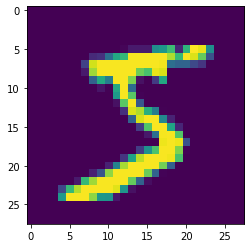

In [7]:
plt.imshow(single_image)

## Data Preprocessing
We first need to make sure the labels will be understandable by our CNN.

In [8]:
#All the training labels
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [9]:
#All the testing labels
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

#### Working of One Hot encoding

Labels are categories of numbers. <br>
We need to translate this to be "one hot encoded" so our CNN can understand, otherwise it will think this is some sort of regression problem on a continuous axis.

We will convert labels (like 5,8,3) into one-hot encoded labels<br>
5 will be written as [0,0,0,0,0,1,0,0,0,0]

In [10]:
#Converting labels to categories function
from keras.utils.np_utils import to_categorical

#### Training Labels and Testing Labels

In [11]:
#Training labels to categories
#10 is the no. of classes to be made

y_cat_train = to_categorical(y_train,10)

In [12]:
#Testing labels to categories
y_cat_test = to_categorical(y_test,10) 

In [13]:
y_cat_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

### Processing X Data

We should normalize the X data b/w 0 and 1 (it is manual method)
(for automated method go for sklearn)

In [14]:
single_image.max()

255

In [15]:
single_image.min()

0

In [16]:
x_train = x_train/255
x_test = x_test/255

In [17]:
scaled_single = x_train[0]

In [18]:
scaled_single.max()

1.0

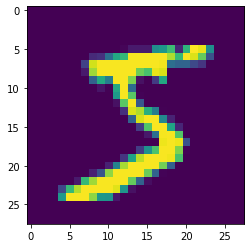

In [19]:
plt.imshow(scaled_single)

### Reshaping the Data

Right now our data is 60,000 images stored in 28 by 28 pixel array formation. 

This is correct for a CNN, but we need to add one more dimension to show we're dealing with 1 RGB channel (since technically the images are in black and white, only showing values from 0-255 on a single channel), Color image would have 3 dimensions.

In [20]:
x_train.shape

(60000, 28, 28)

In [21]:
x_test.shape

(10000, 28, 28)

**Reshape to include channel dimension (in this case, 1 channel)**

In [22]:
#Changing shape to 4 dimensions (images,height,width,color channel)
x_train = x_train.reshape(60000, 28, 28, 1)

In [23]:
x_train.shape

(60000, 28, 28, 1)

In [24]:
x_test = x_test.reshape(10000,28,28,1)

In [25]:
x_test.shape

(10000, 28, 28, 1)

## CNN Model Building

In [26]:
from keras.models import Sequential

from keras.layers import Dense, Convolution2D, MaxPooling2D, Flatten

In [27]:
#Create a model
model = Sequential()

# CONVOLUTIONAL LAYER
#(filters=32 good for such images--for complex images, increase the no. of filters)
#kernel size=(4,4) good, take it (3,3) or (4,4)
#input_shape--the shape of the image
model.add(Convolution2D(filters=32, kernel_size=(4,4),input_shape=(28, 28, 1), activation='relu'))

# POOLING LAYER
#pool_size--(2,2) to good to start with, and you can also read the papers and take the effective pool size from internet
#pool_size -> Matrix to take values from the feature map
model.add(MaxPooling2D(pool_size=(2, 2)))

# FLATTEN IMAGES FROM 28 by 28 to 764 BEFORE FINAL LAYER(flatten from 2d to 1d)
model.add(Flatten())

# 128 NEURONS IN DENSE HIDDEN LAYER
model.add(Dense(128, activation='relu'))

# Output Layer (10 Possible classes)
model.add(Dense(10, activation='softmax'))

In [28]:
#Compiling the model
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [29]:
#Summary of model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               589952    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________


### Train the Model

In [30]:
#Fitting the model to the data
model.fit(x_train,y_cat_train,epochs=2)

Epoch 1/2
1875/1875 [==============================] - 44s 21ms/step - loss: 0.2933 - accuracy: 0.9104
Epoch 2/2
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0496 - accuracy: 0.9843


Model is being trained on 1875 batches of 32 images each, not 1875 images.

1875*32 = 60000 images

### Evaluate the Model

In [31]:
model.metrics_names

['loss', 'accuracy']

In [32]:
#Evaluating model
model.evaluate(x_test,y_cat_test)

313/313 [==============================] - 4s 6ms/step - loss: 0.0441 - accuracy: 0.9857


[0.04406837746500969, 0.9857000112533569]

**There are 313*32= 10016 images that got evaluated**

In [33]:
#Classification report
from sklearn.metrics import classification_report

In [34]:
#Predicting classes
predictions = np.argmax(model.predict(x_test), axis=-1)

C:\Users\DELL\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [42]:
#Shape of Test label
y_cat_test.shape

(10000, 10)

In [43]:
#Label is one hot encoded
y_cat_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [46]:
predictions

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [38]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [45]:
#Classification report
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.98      0.99      0.99      1032
           3       1.00      0.98      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.98      0.99       892
           6       0.99      0.99      0.99       958
           7       0.98      0.99      0.98      1028
           8       0.97      0.99      0.98       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

